## Grayscale Images

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

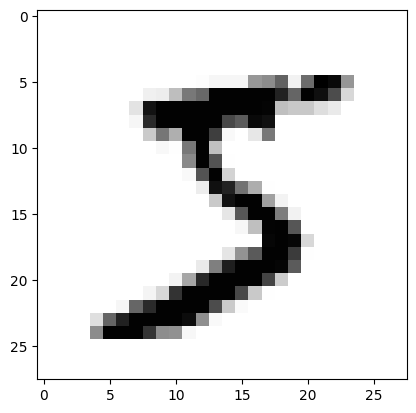

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
# batch_size,width,height,color_channels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [13]:

model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=10, callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9161 - loss: 0.2820 - val_accuracy: 0.9827 - val_loss: 0.0606
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9846 - val_loss: 0.0446
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9887 - val_loss: 0.0356
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9885 - val_loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9869 - val_loss: 0.0485


In [14]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

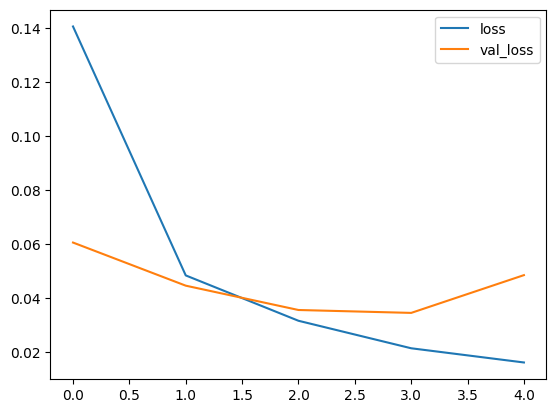

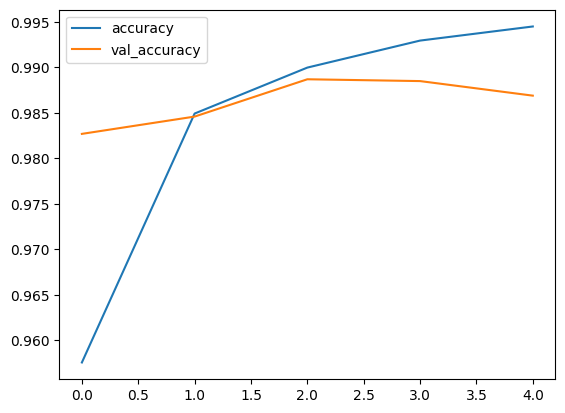

In [15]:
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
preds = (predictions > 0.5).astype("int32")

In [19]:
print(classification_report(y_cat_test, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
confusion_matrix(y_cat_test.argmax(axis=1), preds.argmax(axis=1))

array([[ 976,    0,    0,    1,    0,    0,    2,    0,    1,    0],
       [   1, 1126,    5,    0,    1,    0,    1,    0,    1,    0],
       [   3,    0, 1020,    2,    2,    0,    1,    1,    3,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    0,    3,    0],
       [   1,    0,    0,    0,  975,    0,    0,    0,    0,    6],
       [   2,    0,    1,    6,    0,  881,    1,    0,    1,    0],
       [   5,    3,    0,    0,    8,    2,  936,    0,    4,    0],
       [   4,    2,   17,    3,    1,    0,    0,  984,    4,   13],
       [   3,    0,    1,    1,    0,    0,    0,    0,  966,    3],
       [   3,    0,    0,    0,    5,    2,    0,    0,    4,  995]])

In [21]:
import seaborn as sns

<Axes: >

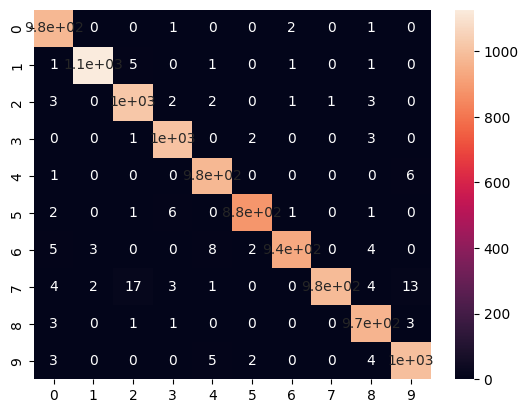

In [22]:
sns.heatmap(confusion_matrix(y_cat_test.argmax(axis=1), preds.argmax(axis=1)), annot=True)

In [23]:
test_pred = (model.predict(x_test[0].reshape(1,28,28,1)) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [24]:
list(test_pred[0]).index(1)

7

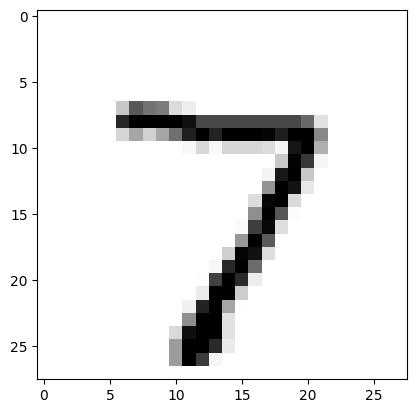

In [25]:
plt.imshow(x_test[0],cmap='Greys')

## Colored Images

In [26]:
from tensorflow.keras.datasets import cifar10

In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

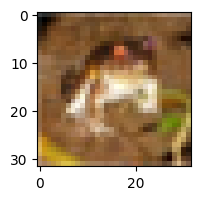

In [28]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

In [29]:
x_train.shape

(50000, 32, 32, 3)

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=15, callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3702 - loss: 1.7166 - val_accuracy: 0.5222 - val_loss: 1.3217
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5682 - loss: 1.2144 - val_accuracy: 0.6077 - val_loss: 1.1307
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6407 - loss: 1.0278 - val_accuracy: 0.6306 - val_loss: 1.0662
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6826 - loss: 0.9072 - val_accuracy: 0.6602 - val_loss: 0.9813
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7207 - loss: 0.8045 - val_accuracy: 0.6640 - val_loss: 0.9894
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7489 - loss: 0.7230 - val_accuracy: 0.6701 - val_loss: 0.9872


<Axes: >

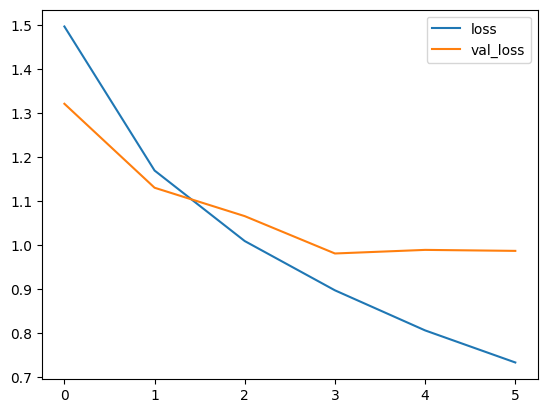

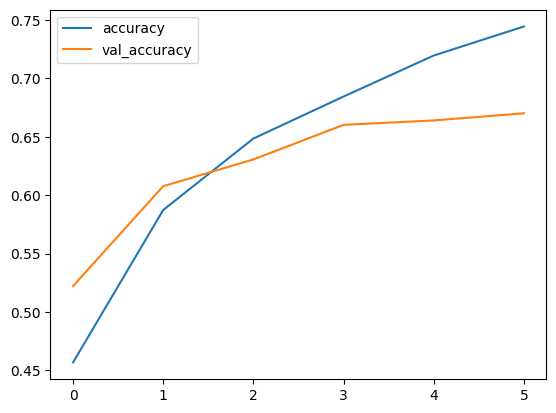

In [34]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [35]:
predictions = model.predict(x_test)
preds = (predictions > 0.5).astype("int32")
print(classification_report(y_cat_test, preds))
confusion_matrix(y_cat_test.argmax(axis=1), preds.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1000
           1       0.84      0.74      0.79      1000
           2       0.67      0.49      0.57      1000
           3       0.62      0.28      0.39      1000
           4       0.68      0.52      0.59      1000
           5       0.63      0.50      0.56      1000
           6       0.84      0.64      0.72      1000
           7       0.79      0.66      0.72      1000
           8       0.80      0.77      0.78      1000
           9       0.74      0.79      0.76      1000

   micro avg       0.75      0.60      0.67     10000
   macro avg       0.74      0.60      0.66     10000
weighted avg       0.74      0.60      0.66     10000
 samples avg       0.60      0.60      0.60     10000



/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[767,  17,  46,   6,  10,   5,   5,   7,  90,  47],
       [103, 740,   4,   2,   4,   1,   6,   0,  25, 115],
       [267,   6, 494,  18,  79,  53,  43,  12,  16,  12],
       [391,   5,  38, 281,  40, 145,  33,  28,  16,  23],
       [294,   5,  48,  11, 516,  23,  21,  63,  15,   4],
       [271,   2,  38,  88,  31, 498,   9,  41,   9,  13],
       [227,   6,  29,  26,  35,  21, 635,   5,   5,  11],
       [200,   3,  20,  14,  40,  37,   2, 660,   4,  20],
       [136,  34,   9,   4,   4,   1,   1,   5, 767,  39],
       [100,  66,   9,   2,   1,   3,   1,  11,  16, 791]])

<Axes: >

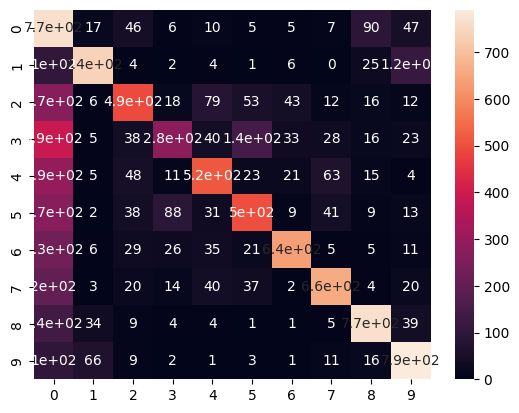

In [36]:
sns.heatmap(confusion_matrix(y_cat_test.argmax(axis=1), preds.argmax(axis=1)), annot=True)

## Real Image Data

In [37]:
import os
data_dir = "/Users/arfsyed/Documents/Learn/tensorflow-experiements/DATA/ignore_dir/cell_images"

In [38]:
from matplotlib.image import imread

In [41]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

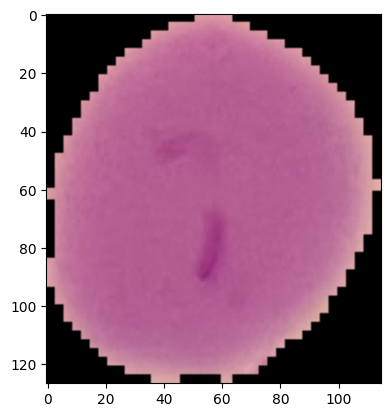

In [56]:
plt.imshow(imread(os.path.join(train_path,'uninfected', os.listdir(os.path.join(train_path,'uninfected'))[0])))

In [57]:
os.path.join(train_path,'uninfected', os.listdir(os.path.join(train_path,'uninfected'))[0])

'/Users/arfsyed/Documents/Learn/tensorflow-experiements/DATA/ignore_dir/cell_images/train/uninfected/C13NThinF_IMG_20150614_131318_cell_179.png'

### Image Generator

## Fasion MNIST

In [59]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


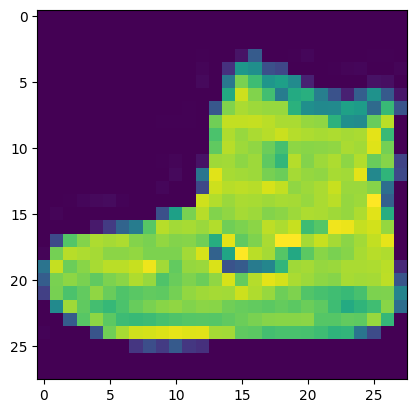

In [60]:
plt.imshow(x_train[0])

In [62]:
x_train[0].max()

255

In [63]:
x_train = x_train/255
x_test = x_test/255

In [64]:
x_train[0].max()

1.0

In [71]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [72]:
x_test.shape

(10000, 28, 28, 1)

In [73]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [75]:
y_cat_test.shape

(10000, 10)

In [78]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), callbacks=[early_stop], epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8103 - loss: 0.5348 - val_accuracy: 0.8767 - val_loss: 0.3428
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8959 - loss: 0.2803 - val_accuracy: 0.8918 - val_loss: 0.2970
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9162 - loss: 0.2287 - val_accuracy: 0.9020 - val_loss: 0.2748
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9314 - loss: 0.1914 - val_accuracy: 0.8953 - val_loss: 0.2990
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9421 - loss: 0.1630 - val_accuracy: 0.9000 - val_loss: 0.3206


<Axes: >

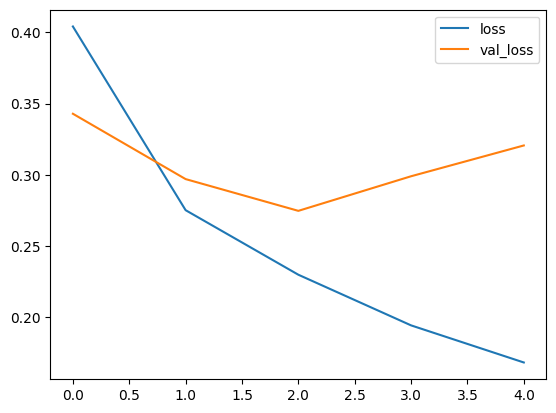

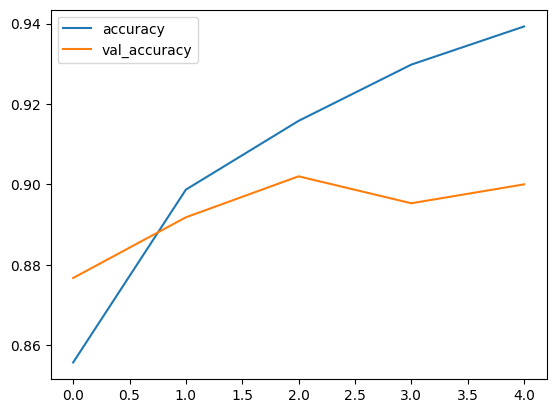

In [81]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()
metrics[['accuracy', 'val_accuracy']].plot()

In [85]:
predictions = model.predict(x_test)
preds = (predictions > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [88]:
confusion_matrix(y_cat_test.argmax(axis=1), preds.argmax(axis=1))

array([[922,   0,  12,   5,   3,   1,  53,   0,   4,   0],
       [  8, 972,   0,  14,   2,   0,   2,   0,   2,   0],
       [ 43,   0, 795,   6,  90,   1,  65,   0,   0,   0],
       [ 52,   5,  13, 859,  43,   0,  23,   0,   5,   0],
       [ 17,   0,  44,  12, 881,   0,  46,   0,   0,   0],
       [  1,   0,   0,   0,   0, 950,   0,  32,   0,  17],
       [173,   0,  40,  18,  75,   0, 685,   0,   9,   0],
       [  0,   0,   0,   0,   0,   3,   0, 983,   0,  14],
       [ 11,   0,   1,   3,   1,   1,   3,   5, 975,   0],
       [  0,   0,   0,   0,   0,   6,   0,  36,   0, 958]])

In [90]:
print(classification_report(y_cat_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.80      0.83      1000
           3       0.94      0.86      0.90      1000
           4       0.80      0.88      0.84      1000
           5       0.99      0.95      0.97      1000
           6       0.78      0.69      0.73      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

   micro avg       0.91      0.90      0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000



/Users/arfsyed/anaconda3/envs/tf_experiments/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
